In [28]:
%matplotlib inline
import random
from sympy import diff, Symbol, sin, cos, limit
from sympy.utilities.lambdify import lambdify, implemented_function
import matplotlib.pyplot as plt
from ipywidgets import interact
import pandas as pd
import numpy as np

#定義loss function 及 loss function的微分，以及 learning rate
x = Symbol('x')
loss_function_expr = (0.0025*x**4)-87*x**2
#loss_function_exec = lambdify((x), loss_function_expr)
def loss_function_exec(x):
    return((0.0025*x**4)-87*x**2)
diff_lossfunc_to_x_expr = diff(loss_function_expr)
#diff_lossfunc_to_x_exec = lambdify((x), diff_lossfunc_to_x_expr)
def diff_lossfunc_to_x_exec(x):
    return(0.01*x**3 - 174*x)
#print(diff_lossfunc_to_x_expr)

    iteri          X     next X             Y        slope   delta X
0       0  -1.000000  -1.017399    -90.051085   173.990000 -0.017399
0       1  -1.017399  -1.035101    -93.211839   177.016895 -0.017702
0       2  -1.035101  -1.053110    -96.483524   180.096430 -0.018010
0       3  -1.053110  -1.071433    -99.870033   183.229518 -0.018323
0       4  -1.071433  -1.090075   -103.375394   186.417092 -0.018642
0       5  -1.090075  -1.109041   -107.003777   189.660096 -0.018966
0       6  -1.109041  -1.128337   -110.759500   192.959494 -0.019296
0       7  -1.128337  -1.147969   -114.647030   196.316264 -0.019632
0       8  -1.147969  -1.167942   -118.670992   199.731404 -0.019973
0       9  -1.167942  -1.188262   -122.836173   203.205927 -0.020321
0      10  -1.188262  -1.208936   -127.147528   206.740864 -0.020674
0      11  -1.208936  -1.229970   -131.610185   210.337264 -0.021034
0      12  -1.229970  -1.251370   -136.229452   213.996194 -0.021400
0      13  -1.251370  -1.273142   

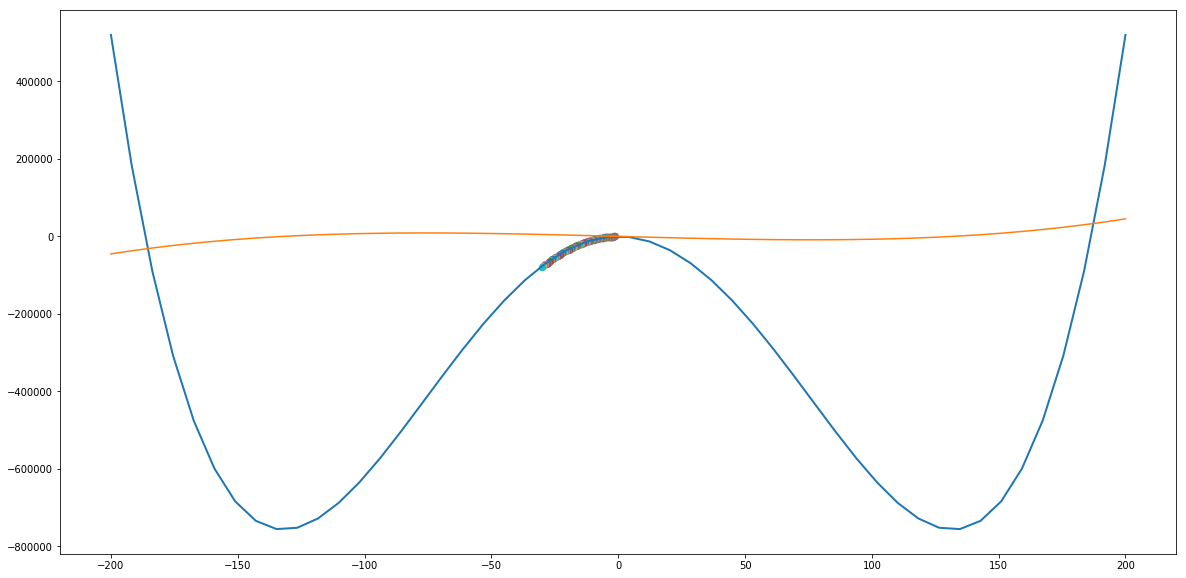

In [45]:
#慢慢移動到最小值，移動200次
#, loss_function_exec = loss_function_exec, diff_lossfunc_to_x_exec = diff_lossfunc_to_x_exec
def gra_dec(iteri=200, start_x = 1, assign_learning_rate=1):
    learning_rate = assign_learning_rate*0.0001
    #df = pd.DataFrame([[start_x, loss_function_exec(random_start), diff_lossfunc_to_x_exec(start_x)]], columns=['X','Y','DIFF'])
    df = pd.DataFrame()
    cm = plt.cm.get_cmap('RdYlBu')
    x = np.linspace(-200,200)
    plt.figure(figsize=(20,10))
    plt.plot(x, loss_function_exec(x),lw=2)
    plt.plot(x, diff_lossfunc_to_x_exec(x))
    #df = df.loc[0:iteri,:]
    #x_points = df.loc[:,X]
    #y_points = df.loc[:,Y]
    #for i in range( len(x_points) ):
    for i in range(iteri):
        slope = diff_lossfunc_to_x_exec(start_x)
        next_point = start_x-learning_rate*slope
        result_y_from_x = loss_function_exec(next_point)
        df2 = pd.DataFrame([[i, start_x, next_point, result_y_from_x, slope, -(learning_rate*slope)]], columns=['iteri','X','next X','Y','slope','delta X'])
        plt.scatter(start_x, result_y_from_x, cmap=cm, s=40, alpha=0+i/iteri)
        df = df.append(df2)
        start_x = next_point
    #plt.scatter(start_x, result_y_from_x, c=i, cmap=cm)
    return(df)


print(gra_dec(200,-1))

In [46]:
interact(gra_dec,iteri=(0,2000), start_x=(-200,200), assign_learning_rate=(1,100))#iteri = 100

interactive(children=(IntSlider(value=200, description='iteri', max=2000), IntSlider(value=1, description='sta…

<function __main__.gra_dec(iteri=200, start_x=1, assign_learning_rate=1)>